Trained Weights: [ 5.6394941e+04  1.1641829e+04  3.0279477e+04 -5.2361951e+02
 -3.4944351e+03  1.0379465e+03  3.5539006e+03  5.0682949e+04
  1.2604646e+04  4.4838174e+03  9.4012920e+03  5.8422017e+03
  5.5842871e+03 -1.3609401e+03 -2.3280642e+03 -1.4297280e+03
 -1.3610092e+03  5.0958853e+00  4.4863394e+03 -1.3606464e+03
 -1.3604689e+03 -1.3610802e+03 -1.7907843e+03 -2.2994326e+04]
Trained Bias: [465.99835]


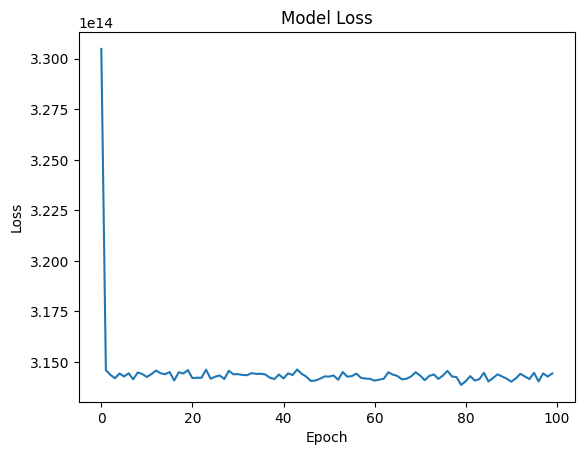

12/12 [==============================] - 0s 2ms/step
pred:  [112.34543587]


'\nwith open(coefficient_output_dataroot, \'w\', newline=\'\', encoding="utf-8") as csvfile:\n  writer = csv.writer(csvfile)\n  for row in coefficient_output:\n    writer.writerow(row)\n'

In [29]:
# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random
import tensorflow as tf


np.random.seed(22)
tf.random.set_seed(22)

training_datalist =  []
testing_datalist =  []
output_datalist =  []
training_dataset = []
validation_dataset = []
y = []
y_val = []
coefficient_output = []



training_dataroot = 'data-1-year.csv'
coefficient_output_dataroot = 'model_coefficient.csv'

"""
data = pd.read_csv(training_dataroot)
#print(data)

features = data.iloc[:, 0]
max_features, min_features = max(features), min(features)
print(features)

features = (features-min_features)/(max_features-min_features)

labels = data.iloc[:, 1]
print(labels)
max_labels, min_labels = max(labels), min(labels)
labels = (labels-min_labels)/(max_labels-min_labels)
"""

with open(training_dataroot, newline='') as csvfile:
  training_datalist = np.array(list(csv.reader(csvfile)))




def SplitData():
    global training_dataset, y, training_datalist
    no = {'latitude', 'longitude', 'closing_year'}
    y = np.array([[float(training_datalist[i][-1])] for i in range(1, len(training_datalist))])
    for i in range(1, len(training_datalist)):
        p = []
        for j in range(len(training_datalist[i])-1):
            if training_datalist[i][0] in no:
                pass
            elif training_datalist[i][j] == 'False' or training_datalist[i][j] == 'True' :
                p.append(1. if training_datalist[i][j] == 'True' else 0.)
            else:
                p.append(float(training_datalist[i][j].replace(',','')))
        training_dataset.append(p)
    training_dataset = np.array(training_dataset)

def train_val_split(X, y, val_size, random_state):
    np.random.seed(random_state)
    np.random.shuffle(X)
    np.random.shuffle(y)

    X_train = X[: int(len(X) - val_size)]
    X_val = X[-int(val_size) :]

    y_train = y[: int(len(y) - val_size)]
    y_val = y[-int(val_size) :]
    return X_train, X_val, y_train, y_val


#trained_weights, trained_bias = 0, 0


def Training():
    global training_dataset, validation_dataset, y, y_val
    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=len(training_dataset[0],)),
    tf.keras.layers.Dense(1)
    ])

    model.compile(tf.keras.optimizers.SGD(learning_rate=0.000001), loss='mse')
    history = model.fit(training_dataset, y, epochs=100, verbose=0)

    trained_weights, trained_bias= model.layers[0].get_weights()

    print("Trained Weights:", trained_weights.flatten())
    print("Trained Bias:", trained_bias)

    plt.plot(history.history['loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


    pred = model.predict(validation_dataset)
    print(f'pred: ', sum(map(lambda x, z: abs((z-x)/z), pred, y_val))/len(y_val)*100)


if __name__ == '__main__':
    SplitData()
    training_dataset, validation_dataset, y, y_val = train_val_split(training_dataset, y, 0.1 * len(y), 22)
    Training()







"""
with open(coefficient_output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in coefficient_output:
    writer.writerow(row)
"""
